# 1. Clustering

#### Import Libraries

In [3]:

import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
import random
from random import randint

# K-means
import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler
from matplotlib.lines import Line2D

from sklearn.cluster import KMeans

from tqdm import tqdm
from pandas.io.json import json_normalize

#### Load Data Set 1


In [4]:
df_1 = pd.read_csv('/Users/beamoralesquel/IronhackLabs/lab-web-scraping-single-page/music_datasets/song_recommender_playlist.csv')
df_1

,artist,song,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,Queen,A Kind Of Magic - Remastered 2011,0.670,0.7760,9.0,-5.874,1.0,0.0356,0.01840,0.002940,0.1280,0.703,130.128,audio_features,5RYLa5P4qweEAKq5U1gdcK,spotify:track:5RYLa5P4qweEAKq5U1gdcK,https://api.spotify.com/v1/tracks/5RYLa5P4qweE...,https://api.spotify.com/v1/audio-analysis/5RYL...,264253.0,4.0
1,Queen,Bohemian Rhapsody - Remastered 2011,0.414,0.4040,0.0,-9.928,0.0,0.0499,0.27100,0.000000,0.3000,0.224,71.105,audio_features,4u7EnebtmKWzUH433cf5Qv,spotify:track:4u7EnebtmKWzUH433cf5Qv,https://api.spotify.com/v1/tracks/4u7EnebtmKWz...,https://api.spotify.com/v1/audio-analysis/4u7E...,354320.0,4.0
2,Queen,Another One Bites The Dust - Remastered 2011,0.933,0.5280,5.0,-6.472,0.0,0.1610,0.11200,0.312000,0.1630,0.754,109.967,audio_features,5vdp5UmvTsnMEMESIF2Ym7,spotify:track:5vdp5UmvTsnMEMESIF2Ym7,https://api.spotify.com/v1/tracks/5vdp5UmvTsnM...,https://api.spotify.com/v1/audio-analysis/5vdp...,214653.0,4.0
3,Queen,Don't Stop Me Now - Remastered 2011,0.559,0.8680,5.0,-5.276,1.0,0.1700,0.04750,0.000176,0.7760,0.609,156.295,audio_features,5T8EDUDqKcs6OSOwEsfqG7,spotify:track:5T8EDUDqKcs6OSOwEsfqG7,https://api.spotify.com/v1/tracks/5T8EDUDqKcs6...,https://api.spotify.com/v1/audio-analysis/5T8E...,209413.0,4.0
4,Queen,Under Pressure - Remastered 2011,0.671,0.7120,2.0,-7.815,1.0,0.0476,0.42900,0.000000,0.1030,0.462,113.805,audio_features,2fuCquhmrzHpu5xcA1ci9x,spotify:track:2fuCquhmrzHpu5xcA1ci9x,https://api.spotify.com/v1/tracks/2fuCquhmrzHp...,https://api.spotify.com/v1/audio-analysis/2fuC...,248440.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12603,Fleetwood Mac,Mystified,0.533,0.2510,3.0,-18.749,1.0,0.0275,0.73100,0.173000,0.0917,0.582,177.957,audio_features,4CtNKBje5C6aOPW0pStdY9,spotify:track:4CtNKBje5C6aOPW0pStdY9,https://api.spotify.com/v1/tracks/4CtNKBje5C6a...,https://api.spotify.com/v1/audio-analysis/4CtN...,190200.0,4.0
12604,Fleetwood Mac,Welcome To The Room...Sara,0.632,0.5550,7.0,-13.081,0.0,0.0409,0.11400,0.000003,0.2600,0.732,99.064,audio_features,5H1EXMKjBFlI5F9QkCD6Ft,spotify:track:5H1EXMKjBFlI5F9QkCD6Ft,https://api.spotify.com/v1/tracks/5H1EXMKjBFlI...,https://api.spotify.com/v1/audio-analysis/5H1E...,222840.0,4.0
12605,Fleetwood Mac,Isn't It Midnight,0.469,0.7300,0.0,-11.890,0.0,0.0358,0.00264,0.048200,0.1500,0.573,145.781,audio_features,2icOTC7sCLZSDVbCPJ6olG,spotify:track:2icOTC7sCLZSDVbCPJ6olG,https://api.spotify.com/v1/tracks/2icOTC7sCLZS...,https://api.spotify.com/v1/audio-analysis/2icO...,253760.0,4.0
12606,Fleetwood Mac,When I See You Again,0.544,0.0907,11.0,-20.015,0.0,0.0268,0.87200,0.000000,0.1030,0.103,79.789,audio_features,0QE9gbtUuiSJIqclW9N2TQ,spotify:track:0QE9gbtUuiSJIqclW9N2TQ,https://api.spotify.com/v1/tracks/0QE9gbtUuiSJ...,https://api.spotify.com/v1/audio-analysis/0QE9...,229493.0,4.0


In [5]:
df_1 = df_1.rename(columns={'song': 'track'})

In [6]:
df_1 = df_1[['artist', 'track', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'uri','duration_ms', 'time_signature']]

In [7]:
df_1.dropna(inplace=True)

#### Load Data Set 2

In [8]:
df_2 = pd.read_csv('/Users/beamoralesquel/IronhackLabs/lab-web-scraping-single-page/music_datasets/dataset-of-60s.csv')
df_2

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Jealous Kind Of Fella,Garland Green,spotify:track:1dtKN6wwlolkM8XZy2y9C1,0.417,0.6200,3,-7.727,1,0.0403,0.490,0.000000,0.0779,0.845,185.655,173533,3,32.94975,9,1
1,Initials B.B.,Serge Gainsbourg,spotify:track:5hjsmSnUefdUqzsDogisiX,0.498,0.5050,3,-12.475,1,0.0337,0.018,0.107000,0.1760,0.797,101.801,213613,4,48.82510,10,0
2,Melody Twist,Lord Melody,spotify:track:6uk8tI6pwxxdVTNlNOJeJh,0.657,0.6490,5,-13.392,1,0.0380,0.846,0.000004,0.1190,0.908,115.940,223960,4,37.22663,12,0
3,Mi Bomba Sonó,Celia Cruz,spotify:track:7aNjMJ05FvUXACPWZ7yJmv,0.590,0.5450,7,-12.058,0,0.1040,0.706,0.024600,0.0610,0.967,105.592,157907,4,24.75484,8,0
4,Uravu Solla,P. Susheela,spotify:track:1rQ0clvgkzWr001POOPJWx,0.515,0.7650,11,-3.515,0,0.1240,0.857,0.000872,0.2130,0.906,114.617,245600,4,21.79874,14,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8637,Le ire di Ursus,Giampiero Boneschi,spotify:track:3dVgolCVuNgecU5jovpc45,0.420,0.8730,3,-11.689,1,0.1000,0.808,0.879000,0.3630,0.183,119.821,26244,4,0.00000,2,0
8638,A-B-C,John Zacherle,spotify:track:0zXhzKf4raEYstebL7L42C,0.716,0.7420,10,-5.727,0,0.2420,0.663,0.000000,0.1070,0.834,135.104,142987,4,28.34316,10,0
8639,Useless Landscape,Antônio Carlos Jobim,spotify:track:2uC02PCRVM6BhAaK7dgxxp,0.361,0.0944,10,-22.663,1,0.0327,0.940,0.000178,0.1150,0.139,92.472,137200,4,56.63498,6,0
8640,Vendedor De Assaí,Ary Lobo,spotify:track:0gpSUWZWNIRrEenaC1ZGk9,0.452,0.7590,4,-7.821,0,0.1750,0.658,0.000000,0.7380,0.853,137.976,159107,3,28.24372,9,0


In [9]:
df_2 = df_2[['artist', 'track', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'uri','duration_ms', 'time_signature']]

#### Load Data Set 3


In [10]:
df_3 = pd.read_csv('/Users/beamoralesquel/IronhackLabs/lab-web-scraping-single-page/music_datasets/dataset-of-00s.csv')
df_3

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Lucky Man,Montgomery Gentry,spotify:track:4GiXBCUF7H6YfNQsnBRIzl,0.578,0.4710,4,-7.270,1,0.0289,0.368000,0.000000,0.1590,0.532,133.061,196707,4,30.88059,13,1
1,On The Hotline,Pretty Ricky,spotify:track:1zyqZONW985Cs4osz9wlsu,0.704,0.8540,10,-5.477,0,0.1830,0.018500,0.000000,0.1480,0.688,92.988,242587,4,41.51106,10,1
2,Clouds Of Dementia,Candlemass,spotify:track:6cHZf7RbxXCKwEkgAZT4mY,0.162,0.8360,9,-3.009,1,0.0473,0.000111,0.004570,0.1740,0.300,86.964,338893,4,65.32887,13,0
3,"Heavy Metal, Raise Hell!",Zwartketterij,spotify:track:2IjBPp2vMeX7LggzRN3iSX,0.188,0.9940,4,-3.745,1,0.1660,0.000007,0.078400,0.1920,0.333,148.440,255667,4,58.59528,9,0
4,I Got A Feelin',Billy Currington,spotify:track:1tF370eYXUcWwkIvaq3IGz,0.630,0.7640,2,-4.353,1,0.0275,0.363000,0.000000,0.1250,0.631,112.098,193760,4,22.62384,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5867,Summer Rain,Carl Thomas,spotify:track:0NBHHa8wwwmBnn3aAzX5wJ,0.667,0.6270,6,-10.488,0,0.0654,0.097200,0.000052,0.1110,0.784,186.081,232560,4,40.87045,10,1
5868,And I,Ciara,spotify:track:1Jp9n1uHB72CfK31j4mEPh,0.691,0.3890,6,-10.125,1,0.0653,0.255000,0.000000,0.0981,0.437,122.219,233840,4,81.77735,7,1
5869,"Mass in B minor BWV 232, Missa: Duetto - Chris...",Johann Sebastian Bach,spotify:track:4NIOi1ImMfdufRTsgoKjbD,0.297,0.0773,2,-23.839,1,0.0620,0.951000,0.000217,0.1210,0.401,75.916,275560,4,37.51903,11,0
5870,Loog,The Clean,spotify:track:2Qyj2nUdm8y37TCCzDasFn,0.390,0.6010,7,-8.236,0,0.0291,0.031300,0.947000,0.1190,0.439,116.122,223627,4,39.84092,11,0


In [11]:
df_3 = df_3[['artist', 'track', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'uri','duration_ms', 'time_signature']]

#### Concat all the datasets

In [12]:
df_final = pd.concat([df_1, df_2, df_3], axis=0)

#### Save all together in a new .csv

In [13]:
df_final.to_csv('song_recommender_with3_playlist.csv',index=False)

In [14]:
#lower case all the values for an easy job

df_final = df_final.apply(lambda df_final: df_final.str.lower() if(df_final.dtype == 'object') else df_final)
df_final

,artist,track,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,uri,duration_ms,time_signature
0,queen,a kind of magic - remastered 2011,0.670,0.7760,9.0,-5.874,1.0,0.0356,0.0184,0.002940,0.1280,0.703,130.128,spotify:track:5ryla5p4qweeakq5u1gdck,264253.0,4.0
1,queen,bohemian rhapsody - remastered 2011,0.414,0.4040,0.0,-9.928,0.0,0.0499,0.2710,0.000000,0.3000,0.224,71.105,spotify:track:4u7enebtmkwzuh433cf5qv,354320.0,4.0
2,queen,another one bites the dust - remastered 2011,0.933,0.5280,5.0,-6.472,0.0,0.1610,0.1120,0.312000,0.1630,0.754,109.967,spotify:track:5vdp5umvtsnmemesif2ym7,214653.0,4.0
3,queen,don't stop me now - remastered 2011,0.559,0.8680,5.0,-5.276,1.0,0.1700,0.0475,0.000176,0.7760,0.609,156.295,spotify:track:5t8edudqkcs6osowesfqg7,209413.0,4.0
4,queen,under pressure - remastered 2011,0.671,0.7120,2.0,-7.815,1.0,0.0476,0.4290,0.000000,0.1030,0.462,113.805,spotify:track:2fucquhmrzhpu5xca1ci9x,248440.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5867,carl thomas,summer rain,0.667,0.6270,6.0,-10.488,0.0,0.0654,0.0972,0.000052,0.1110,0.784,186.081,spotify:track:0nbhha8wwwmbnn3aazx5wj,232560.0,4.0
5868,ciara,and i,0.691,0.3890,6.0,-10.125,1.0,0.0653,0.2550,0.000000,0.0981,0.437,122.219,spotify:track:1jp9n1uhb72cfk31j4meph,233840.0,4.0
5869,johann sebastian bach,"mass in b minor bwv 232, missa: duetto - chris...",0.297,0.0773,2.0,-23.839,1.0,0.0620,0.9510,0.000217,0.1210,0.401,75.916,spotify:track:4nioi1immfdufrtsgokjbd,275560.0,4.0
5870,the clean,loog,0.390,0.6010,7.0,-8.236,0.0,0.0291,0.0313,0.947000,0.1190,0.439,116.122,spotify:track:2qyj2nudm8y37tcczdasfn,223627.0,4.0


In [15]:
#deling with duplicates

df_final = df_final.drop_duplicates()
df_final = df_final.reset_index(drop=True)

In [16]:
df_final.shape

(26970, 16)

In [17]:
#changing some numerical values to string from 'track' column

df_final['track'] = df_final['track'].astype(str)

In [18]:
#deleting words in different languages from 'track' column: remaster/remasterizado

tracklist = []
for i in range (len(df_final)):
    #print(df_final['track'][i])
    if ('remastered' in df_final['track'][i])|('remasterizado' in df_final['track'][i]):
        if '-' in df_final['track'][i]:
            tracklist.append(df_final['track'][i].split(' -')[0])
        elif ' [r' in df_final['track'][i]:
            tracklist.append(df_final['track'][i].split(' [r')[0])
        elif ' (r' in df_final['track'][i]:
            tracklist.append(df_final['track'][i].split(' (r')[0])    
    else:
        tracklist.append(df_final['track'][i])

df_final['track'] = tracklist       

In [19]:
#deleting some spaces

df_final['track'] = df_final['track'].str.rstrip()

In [20]:
#and some duplicates

df_final = df_final.drop_duplicates()

In [21]:
#drop some columns because KMeans cannot deal with categorical variables and some are not necessary

df_final = df_final.drop(columns= ['key', 'uri', 'duration_ms','mode', 'time_signature'], axis=1)
df_final

,artist,track,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,queen,a kind of magic,0.670,0.7760,-5.874,0.0356,0.0184,0.002940,0.1280,0.703,130.128
1,queen,bohemian rhapsody,0.414,0.4040,-9.928,0.0499,0.2710,0.000000,0.3000,0.224,71.105
2,queen,another one bites the dust,0.933,0.5280,-6.472,0.1610,0.1120,0.312000,0.1630,0.754,109.967
3,queen,don't stop me now,0.559,0.8680,-5.276,0.1700,0.0475,0.000176,0.7760,0.609,156.295
4,queen,under pressure,0.671,0.7120,-7.815,0.0476,0.4290,0.000000,0.1030,0.462,113.805
...,...,...,...,...,...,...,...,...,...,...,...
26965,carl thomas,summer rain,0.667,0.6270,-10.488,0.0654,0.0972,0.000052,0.1110,0.784,186.081
26966,ciara,and i,0.691,0.3890,-10.125,0.0653,0.2550,0.000000,0.0981,0.437,122.219
26967,johann sebastian bach,"mass in b minor bwv 232, missa: duetto - chris...",0.297,0.0773,-23.839,0.0620,0.9510,0.000217,0.1210,0.401,75.916
26968,the clean,loog,0.390,0.6010,-8.236,0.0291,0.0313,0.947000,0.1190,0.439,116.122


#### Xy Split

In [22]:
#Now we split the df taking out the target (y) (we don't need it for clustering)

X = df_final.drop(['artist', 'track'], axis = 1)
y = df_final[['artist', 'track']]

In [23]:
# K-Means is a distance based algorithm: we need to scale / normalize:

scaler = StandardScaler()
X_prep = scaler.fit_transform(X)

# Now, all features will have the same weight.
pd.DataFrame(X_prep,columns=X.columns).head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.850542,0.645329,0.679180,-0.413382,-0.978411,-0.468433,-0.450860,0.698939,0.372036
1,-0.634254,-0.802391,-0.146160,-0.255065,-0.237229,-0.478840,0.579093,-1.134779,-1.656870
2,2.375939,-0.319818,0.557435,0.974934,-0.703769,0.625593,-0.241276,0.894179,-0.320995
3,0.206744,1.003367,0.800925,1.074574,-0.893026,-0.478217,3.429429,0.339086,1.271522
4,0.856342,0.396259,0.284019,-0.280529,0.226376,-0.478840,-0.600562,-0.223662,-0.189064


In [24]:
#Now is time to cluster our X_prep

kmeans = KMeans(n_clusters=50, random_state=1989) 
kmeans.fit(X_prep)

/Users/beamoralesquel/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=50, random_state=1989)

In [25]:
# Predicting / assigning the clusters:
clusters = kmeans.predict(X_prep)

# Check the size of the clusters
pd.Series(clusters).value_counts().sort_index()

0      742
1      559
2      504
3      664
4      624
5      189
6      746
7      455
8      298
9      823
10     131
11     314
12     580
13     319
14     284
15     316
16    1068
17     739
18     314
19     425
20     655
21     435
22     782
23     724
24     147
25     970
26     299
27     768
28     660
29     340
30     383
31     387
32     678
33     715
34     433
35     778
36     157
37     443
38     421
39     317
40     746
41     860
42     799
43     360
44     217
45     558
46     663
47     431
48     836
49     910
dtype: int64

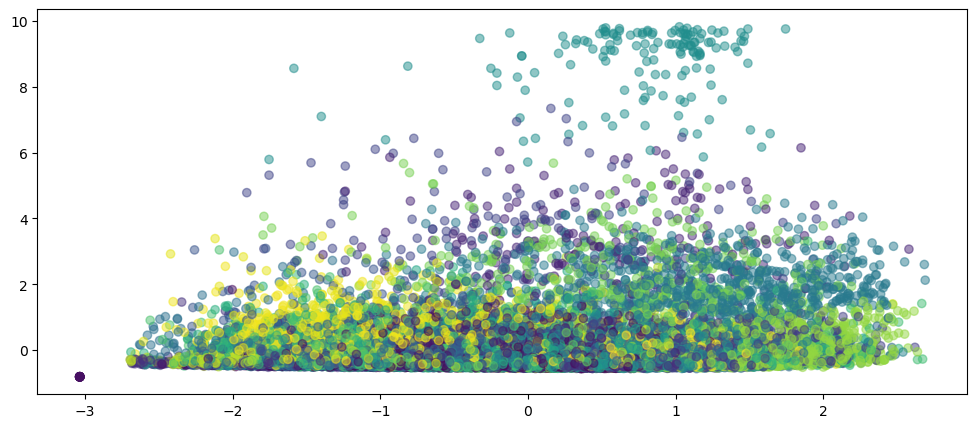

In [26]:
#plotting the results

plt.figure(figsize=(12, 5))
plt.scatter(X_prep[:, 0], X_prep[:, 3], c=clusters,alpha=0.5) #elegimos 2 columnas, en este caso 0 y 3. No puedes escoger mas de dos. 
plt.show()

In [27]:
# Now we can look at the average of each cluster, and how far/near the points are from it. 

kmeans.inertia_ 

57333.077811978175

In [28]:
%%time
kmeans = KMeans(n_clusters=50,
                init="random",
                n_init=10,  # try with 1, 4, 8, 20, 30, 100...
                max_iter=10,
                tol=0,
                random_state=1989)
kmeans.fit(X_prep)
print(kmeans.inertia_)

58062.32282031105
CPU times: user 1.22 s, sys: 72.5 ms, total: 1.29 s
Wall time: 679 ms


# Determining number of Clusters

## Chooosing K: Elbow Method

/Users/beamoralesquel/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/beamoralesquel/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/beamoralesquel/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/beamoralesquel/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
 

/Users/beamoralesquel/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/beamoralesquel/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/beamoralesquel/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/beamoralesquel/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
 

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

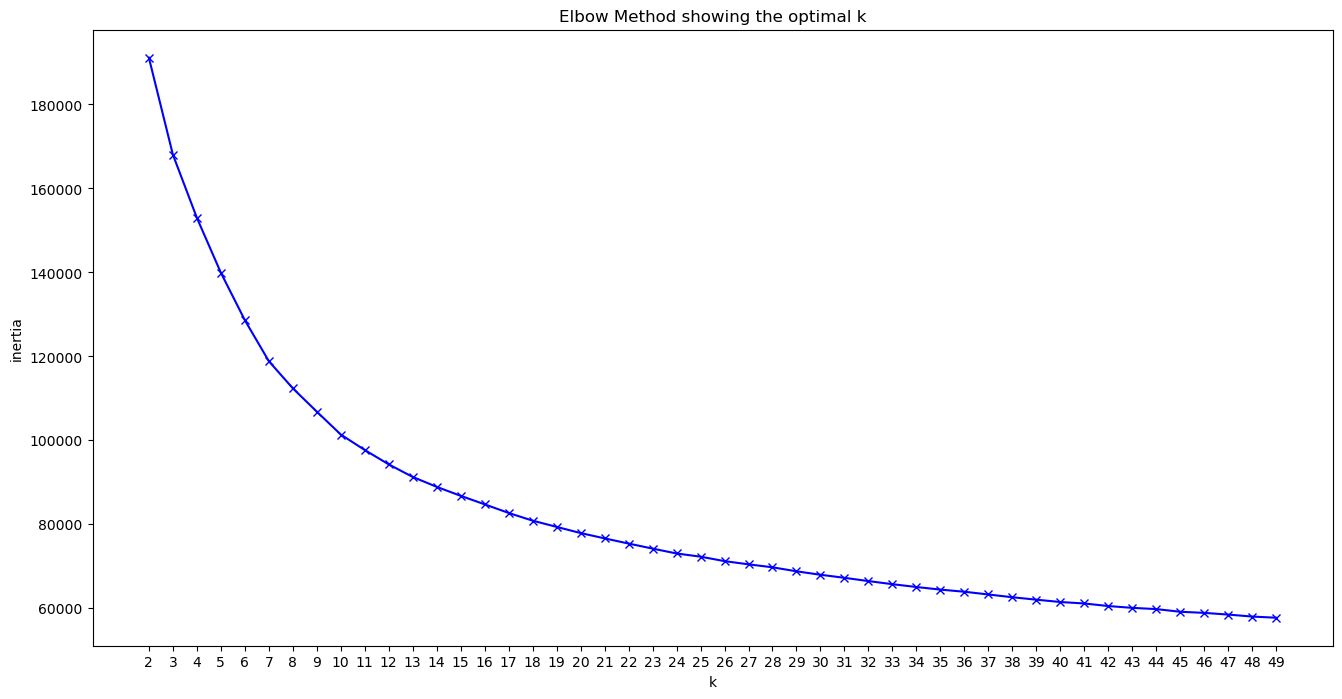

In [29]:
import numpy as np
K = range(2, 50)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1989)
    kmeans.fit(X_prep)
    inertia.append(kmeans.inertia_)

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

With Elbow Method is not very clear what is the best k for our model, so we are going to try with other method.

## Chooosing K: The Silhouette Method

/Users/beamoralesquel/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/beamoralesquel/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/beamoralesquel/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/beamoralesquel/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
 

/Users/beamoralesquel/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/beamoralesquel/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/beamoralesquel/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/beamoralesquel/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
 

Text(0.5, 1.0, 'Slhouette score showing the optimal k')

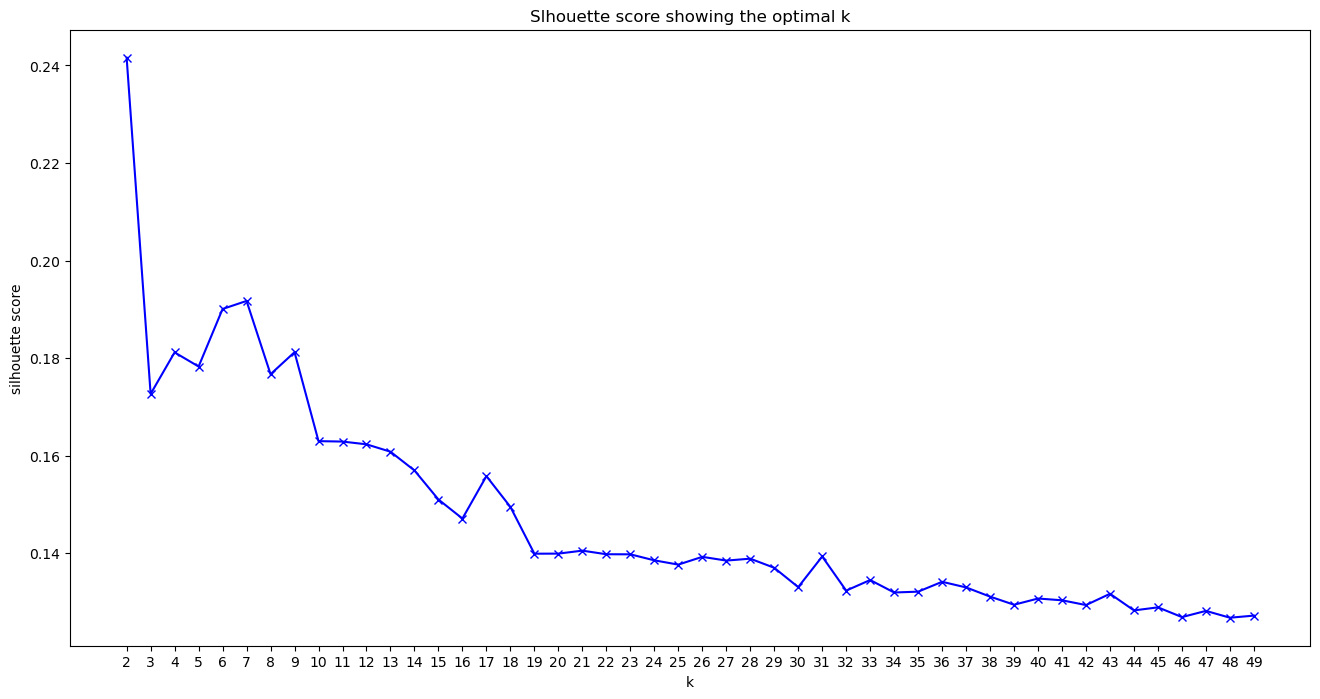

In [30]:
from sklearn.metrics import silhouette_score
K = range(2, 50)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_prep)
    silhouette.append(silhouette_score(X_prep, kmeans.predict(X_prep)))
    
#la función silhouette te da un valor de lo bien que se ha clasificado cada objeto. La silueta va de -1 a +1, donde un valor alto indica que el objeto está bien emparejado con su propio cúmulo y mal emparejado con los cúmulos vecinos

plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Slhouette score showing the optimal k')

Is not clear yet, so we are going to try with PCA

# PCA

In [31]:
from sklearn.decomposition import PCA

In [32]:
pca = PCA()
pca.fit(X_prep)

PCA()

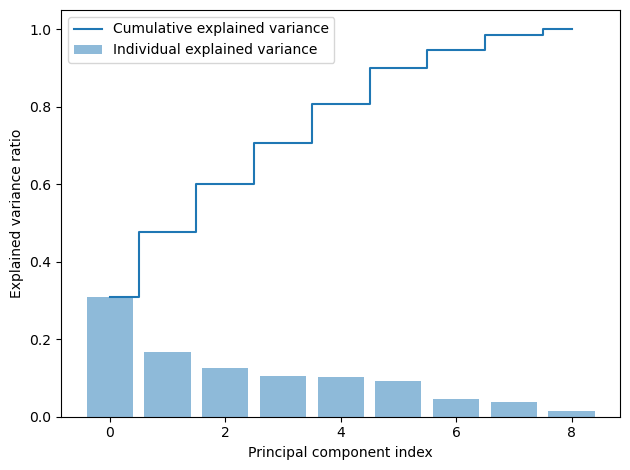

In [33]:
import numpy as np
exp_var_pca = pca.explained_variance_ratio_

# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.

cum_sum_eigenvalues = np.cumsum(exp_var_pca)
#cum_sum_eigenvalues

# Create the visualization plot
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, 
        alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, 
         where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

#### Now we know that 7 is the ideal K number, we can once again fit our model (this time to the correct number)

In [34]:
kmeans = KMeans(n_clusters=7, random_state=1989)
kmeans.fit(X_prep)

/Users/beamoralesquel/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=7, random_state=1989)

In [35]:
#And we can check again our clusters sizes

clusters = kmeans.predict(X_prep)
pd.Series(clusters).value_counts().sort_index()

0    6371
1    1836
2     809
3    8120
4    2279
5    1688
6    5863
dtype: int64

In [26]:
#Once this is done, we add our clusters to our previous dataframe.

df_final['cluster'] = clusters
df_final

,artist,track,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster
0,queen,a kind of magic,0.670,0.7760,-5.874,0.0356,0.0184,0.002940,0.1280,0.703,130.128,49
1,queen,bohemian rhapsody,0.414,0.4040,-9.928,0.0499,0.2710,0.000000,0.3000,0.224,71.105,0
2,queen,another one bites the dust,0.933,0.5280,-6.472,0.1610,0.1120,0.312000,0.1630,0.754,109.967,41
3,queen,don't stop me now,0.559,0.8680,-5.276,0.1700,0.0475,0.000176,0.7760,0.609,156.295,13
4,queen,under pressure,0.671,0.7120,-7.815,0.0476,0.4290,0.000000,0.1030,0.462,113.805,9
...,...,...,...,...,...,...,...,...,...,...,...,...
26965,carl thomas,summer rain,0.667,0.6270,-10.488,0.0654,0.0972,0.000052,0.1110,0.784,186.081,45
26966,ciara,and i,0.691,0.3890,-10.125,0.0653,0.2550,0.000000,0.0981,0.437,122.219,9
26967,johann sebastian bach,"mass in b minor bwv 232, missa: duetto - chris...",0.297,0.0773,-23.839,0.0620,0.9510,0.000217,0.1210,0.401,75.916,43
26968,the clean,loog,0.390,0.6010,-8.236,0.0291,0.0313,0.947000,0.1190,0.439,116.122,14


In [37]:
#..and save it in a new .csv

df_final.to_csv('song_recommender_playlist_clusters.csv', index = False)

# 2. The recommender

Step 1: Check whether or not the input song is in the PopVortex Hot 100 and recommend another Hot 100 song

Step 2: If it is NOT in the hot 100, then collect the audio features from the Spotify API for the input song.
I want to send the Spotify audio features of the submitted song to the clustering model, which should return a cluster number.
Then I recommend a song from the same cluster number.

In [27]:
#Load Data Set top100 PopVortex
top100 = pd.read_csv('top100_from_PopVortex.csv')
top100

,artist,track,genre,year
0,oliver anthony music,rich men north of richmond,country,2023
1,jimmy buffett,margaritaville,unknown,1977
2,zach bryan,i remember everything (feat. kacey musgraves),country,2023
3,jimmy buffett,come monday,unknown,1974
4,doja cat,paint the town red,unknown,2023
...,...,...,...,...
91,chris tomlin,holy forever,christian & gospel,2022
92,jimmy buffett & martina mcbride,trip around the sun,country,2004
93,fleetwood mac,everywhere,rock,1987
94,kane brown & katelyn brown,thank god,country,2022


In [28]:
def music_recommender():

    ################################## TAKE SONG AND ARTIST NAME ##################################

    song = input("write the name of a song: ") 
    artist = input('write the name of an artist: ')

    
    ################################## IF SONG IN TOP 100 ##################################
    if song in list(top100['track']):
        print("HOT HOT HOT!, we recommend:", top100['track'].iloc[random.randint(0,100)])    
    
    
    ################################## IF NOT IN TOP 100 ##################################
    elif song not in list(top100['track']):
    
    
    
    ################################## CONNECT TO API ##################################
    
        import spotipy
        from spotipy.oauth2 import SpotifyClientCredentials
        
        secrets_file = open("secrets.txt","r")
        
        string = secrets_file.read()
        
        
        #We create a dictionary with the string/info above
        
        secrets_dict={}
        for line in string.split('\n'):
            if len(line) > 0:
                #print(line.split(':'))
                secrets_dict[line.split(':')[0]]=line.split(':')[1].strip() 
                #[line.split(':')[0]] esto es la key de mi diccionario, en este caso clientid o clientsecret
                #line.split(':')[1] esto es el valor, en este caso el numero, que tendra cada key
                
                
                
        import spotipy
        from spotipy.oauth2 import SpotifyClientCredentials
        
        #Initialize SpotiPy with user credentials
        sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=secrets_dict['clientid'],
                                                                   client_secret=secrets_dict['clientsecret']))         
                    
            
        ################################## SEARCH FOR SONG ##################################
        
        
        
        results = sp.search(q= artist + song, limit=10)
        
        
        
        
        ################################## EXTRACT & TRANSFORM FEATURES ##################################
        
        
        
        #EXTRACT
        mini_df = pd.DataFrame({'features': sp.audio_features(results['tracks']['items'][0]['uri'])})
        
        
        #NORMALISE
        features = json_normalize(mini_df['features']).drop(columns= ['key', 'uri', 'duration_ms','mode', 'time_signature', 'type', 'id', 'track_href', 'analysis_url'], axis=1)
        
        
        #SCALE
        features_scaled = scaler.transform(features)
        
        
        
        ################################## FIND CLUSTER ##################################
        
        
        
        
        #DETERMINE CLUSTER NUMBER
        clusternum = kmeans.predict(features_scaled)[0]
        
        #FIND RANDOM SONG IN FILTERED DATAFRAME BY CLUSTER NUMBER 
        clusdf = df_final[df_final['cluster'] == clusternum].reset_index(drop = True).iloc[randint(0,len(df_final[df_final['cluster'] == clusternum])-1)]
        
        
        
        
        ################################## OUTPUT THE SONG ##################################
        
        
        #SEARCH FOR SONG IN SPOTIFY
        outresults = sp.search(q= clusdf[0] + clusdf[1], limit=10)
        
        
        
        #RECOMMEND SONG, ARTIST, AND PROVIDE LINK
        print('I recommend "'+outresults['tracks']['items'][0]['name']+'", by', outresults['tracks']['items'][0]['album']['artists'][0]['name']+". Follow:", outresults['tracks']['items'][0]['external_urls']['spotify'],"to listen to the song")
        

In [29]:
music_recommender()

write the name of a song: yesterday
write the name of an artist: the beatles


/var/folders/75/lxv2pt816y3g7mh_b0zy07mw0000gn/T/ipykernel_9852/3401354094.py:67: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  features = json_normalize(mini_df['features']).drop(columns= ['key', 'uri', 'duration_ms','mode', 'time_signature', 'type', 'id', 'track_href', 'analysis_url'], axis=1)


I recommend "Dear Mr. President (feat. Indigo Girls)", by P!nk. Follow: https://open.spotify.com/track/6ndF1XQNseMhJGp7wAAILs to listen to the song


___________